In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar
import healpy as hp


In [2]:
# Load up the analysis of the different simulations
df = pd.read_hdf('simulation_dbs/summary.h5')

In [3]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,3x2ptFoM ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,Mean ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Rms ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median SurfaceBrightLimit i HealpixSlicer,Sum NgalScale i HealpixSlicer
run_name,,,,,,,,,,,,,,,,,,,,,
satellite_sim_0.0_onew_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv1_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv2_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.1_onew_v2.2_1yrs,364.998009,3384.0,0.716808,0.719362,214035.0,0.0,214035.0,7.897877,4.891482,2.0,...,-1.637500e+30,-1.637500e+30,25.454056,25.443157,0.044831,815.793423,24.145443,-666.0,28.573982,1.397698e+07
satellite_sim_0.1_slv1_v2.2_1yrs,364.998198,3390.0,0.716865,0.719733,214086.0,0.0,214086.0,7.898024,4.890839,2.0,...,-1.637500e+30,-1.637500e+30,25.455705,25.447249,0.042689,1170.814635,24.090104,-666.0,28.575860,1.413346e+07
satellite_sim_0.1_slv2_v2.2_1yrs,364.998095,3399.0,0.717148,0.717716,214146.0,0.0,214146.0,7.880273,4.888636,2.0,...,-1.637500e+30,-1.637500e+30,25.444550,25.434624,0.037525,703.328075,24.150973,-666.0,28.570983,1.399130e+07
satellite_sim_1.0_onew_v2.2_1yrs,364.997813,3348.0,0.716274,0.719743,213896.0,0.0,213896.0,7.931131,4.894397,2.0,...,-1.637500e+30,-1.637500e+30,25.454198,25.445268,0.043549,1028.134715,24.112333,-666.0,28.576064,1.388939e+07
satellite_sim_1.0_slv1_v2.2_1yrs,364.997929,3352.0,0.717218,0.720190,214203.0,0.0,214203.0,7.878771,4.895048,2.0,...,-1.637500e+30,-1.637500e+30,25.448768,25.440391,0.038652,828.382828,24.138899,-666.0,28.574194,1.405381e+07
satellite_sim_1.0_slv2_v2.2_1yrs,364.998075,3362.0,0.716855,0.723456,214041.0,0.0,214041.0,7.897200,4.897824,2.0,...,-1.637500e+30,-1.637500e+30,25.453393,25.443134,0.043276,769.632273,24.153099,-666.0,28.578708,1.433445e+07


In [4]:
# Ugh, I was dumb. Let's try to sort by satellite basis function weight

weight = [float(rn.replace('satellite_sim_', '').split('_')[0]) for rn in df.index]

In [5]:
order = np.argsort(weight)
df = df.iloc[order]

Text(0, 0.5, 'N Visits')

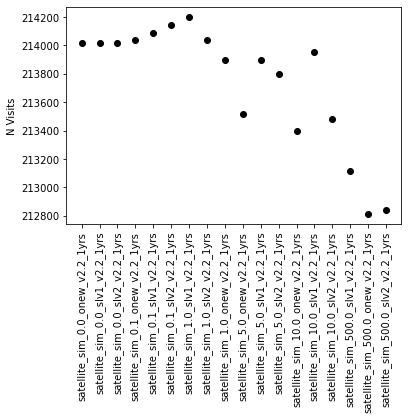

In [6]:

    
fig, ax = plt.subplots()

ax.plot(df['Number of Exposures'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N Visits')

Text(0, 0.5, '$\\Delta m$ (mags)')

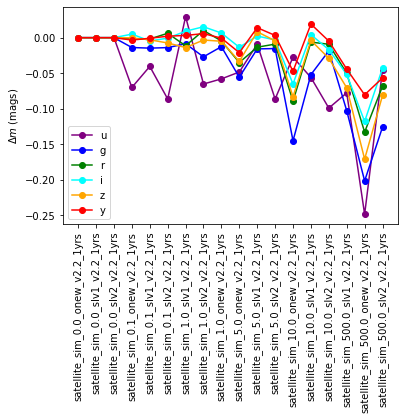

In [8]:
fig, ax = plt.subplots()
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

for filtername in 'ugrizy':
    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    ax.plot(df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername )
    
ack = ax.tick_params('x',  rotation=90)
ax.legend()
ax.set_ylabel('$\Delta m$ (mags)')